# Neural Computing Coursework 
### Morteza Layegh Mirhosseini --- Student ID : 220003166

# Test Notebook

In [1]:
import numpy as np
import pandas as pd
import torch
import random
import matplotlib.pyplot as plt
import time 
import torch.nn as nn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from skorch import NeuralNetClassifier
import seaborn as sns
import torch
from torch import nn
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from torch.optim import Adam
from skorch.callbacks import EpochScoring
from skorch.callbacks import EarlyStopping
from skorch.dataset import ValidSplit
from skorch import NeuralNetClassifier
import pickle

In [2]:
import numpy as np
print("NumPy version:", np.__version__)

import pandas as pd
print("Pandas version:", pd.__version__)

import torch
print("PyTorch version:", torch.__version__)

import sklearn
print("Scikit-learn version:", sklearn.__version__)

import skorch
print("Skorch version:", skorch.__version__)

import seaborn as sns
print("Seaborn version:", sns.__version__)

import matplotlib
print("Matplotlib version:", matplotlib.__version__)

NumPy version: 1.21.5
Pandas version: 1.4.2
PyTorch version: 1.13.1+cpu
Scikit-learn version: 1.1.3
Skorch version: 0.12.1
Seaborn version: 0.11.2
Matplotlib version: 3.5.1


# Read Preprocessed data

In [3]:
X_train= pd.read_csv('X_train.csv').to_numpy()
X_test= pd.read_csv('X_test.csv').to_numpy()
y_train= pd.read_csv('y_train.csv').to_numpy()
y_test= pd.read_csv('y_test.csv').to_numpy()


# loading the trained SVM model 

In [4]:
# Load the gs instance from the file
with open('gridsearch_svm.pickle', 'rb') as f:
    gridsearch_svm = pickle.load(f)

### plotting the svm results

Predict time: 1.9023895263671875
[[ 167  158]
 [  50 1651]]
0.8973346495557749
              precision    recall  f1-score   support

           0       0.77      0.51      0.62       325
           1       0.91      0.97      0.94      1701

    accuracy                           0.90      2026
   macro avg       0.84      0.74      0.78      2026
weighted avg       0.89      0.90      0.89      2026



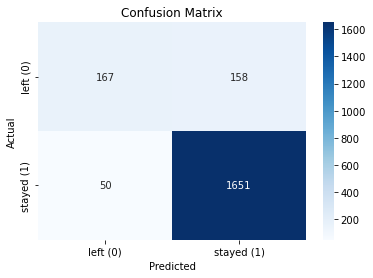

AUC: 0.7422258400036178


In [5]:
# measure prediction time
start_time = time.time()
y_pred = gridsearch_svm.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

print("Predict time:", prediction_time)

#evaluate 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

# define the labels for the matrix
labels = ['left (0)', 'stayed (1)']


# create the heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# show the plot
plt.show()

from sklearn.metrics import precision_recall_fscore_support
# calculate precision, recall, and F1 score
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred, average='macro')

from sklearn.metrics import classification_report, roc_auc_score
print("AUC:", roc_auc_score(y_test, y_pred))

# MLP Model 
## architecture 

In [6]:
X_train, y_train = X_train.astype(np.float32), y_train.astype(np.int64)
X_test, y_test = X_test.astype(np.float32), y_test.astype(np.int64)
y_train = np.expand_dims(y_train, axis=-1).astype(np.float32)

auc = EpochScoring(scoring='precision', lower_is_better=False)
Early_stopping= EarlyStopping(monitor='valid_loss', patience=10)

class ClassifierModule(nn.Module):
    def __init__(
            self,
            num_units1=64,
            num_units2=32,
            num_units3=16,
            nonlin=F.relu,
            dropout=0.3,
    ):
        super(ClassifierModule, self).__init__()
        self.num_units1 = num_units1
        self.num_units2 = num_units2
        self.num_units3 = num_units3
        self.nonlin = nonlin

        self.dense0 = nn.Linear(36, num_units1)
        self.dropout = nn.Dropout(dropout)
        self.dense1 = nn.Linear(num_units1, num_units2)
        self.dense2 = nn.Linear(num_units2, num_units3)
        self.output = nn.Linear(num_units3,1)
        self.sigmoid = torch.sigmoid

        
    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense1(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense2(X))
        X = self.dropout(X)
        X = self.sigmoid(self.output(X))
        return X


# Loading the trained MLP model

In [7]:
# Load the gs instance from the file
with open('gridsearch_lr.pickle', 'rb') as f:
    gridsearch_lr = pickle.load(f)

# Testing the final MLP model and plotting the results

In [8]:
# measure prediction time
start_time = time.time()
y_pred = gridsearch_lr.predict(X_test)
end_time = time.time()
prediction_time = end_time - start_time

print("Predict time:", prediction_time)

#evaluate 
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

from sklearn.metrics import classification_report, roc_auc_score
print("AUC:", roc_auc_score(y_test, y_pred))

Predict time: 0.08305048942565918
[[ 279   46]
 [ 135 1566]]
0.9106614017769002
              precision    recall  f1-score   support

           0       0.67      0.86      0.76       325
           1       0.97      0.92      0.95      1701

    accuracy                           0.91      2026
   macro avg       0.82      0.89      0.85      2026
weighted avg       0.92      0.91      0.91      2026

AUC: 0.8895482295482294


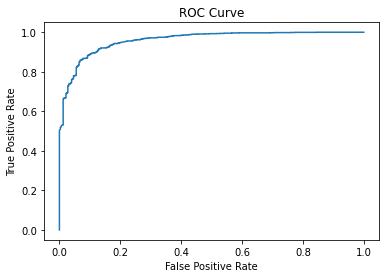

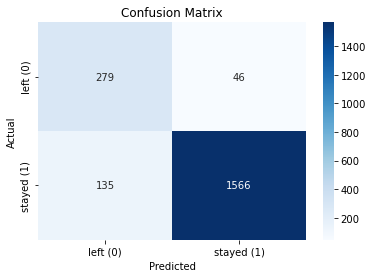

In [9]:
# import necessary libraries
from sklearn.metrics import roc_curve

# get the predicted probabilities and true labels for the test set
y_pred_proba = gridsearch_lr.predict_proba(X_test)[:, 1]
y_true = y_test

# calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


# define the labels for the matrix
labels = ['left (0)', 'stayed (1)']

# create the heatmap using seaborn
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)

# add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# show the plot
plt.show()

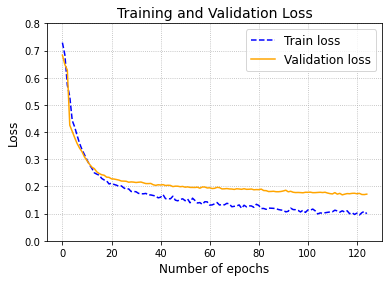

In [10]:

# Get the training history from the best estimator
history = gridsearch_lr.best_estimator_.history

# Extract the training and validation loss values
train_loss = history[:, 'train_loss']
valid_loss = history[:, 'valid_loss']

# Plot the training and validation loss against the number of epochs
plt.plot(train_loss, label='Train loss', linestyle='dashed', color='blue')
plt.plot(valid_loss, label='Validation loss', linestyle='solid', color='orange')
plt.xlabel('Number of epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim([0, 0.8])
plt.grid(linestyle='dotted')
plt.show()